로지스틱 회귀
scikit-learn의 LogisticRegression

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

body=pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/bodyPerformance.csv")
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [3]:
# gender변수 np.where을 사용해서 binary로 바꿔준다.
# 이진 분류 사용 예정
body['gender']=np.where(body['gender']=='M', 0, 1)
body['class_1']=np.where(body['class']=='A', 1, 0)
body

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_1
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,1
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,0
13389,21.0,0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,0
13390,39.0,0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,1
13391,64.0,1,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,0


In [4]:
from sklearn.model_selection import train_test_split

feature_columns = list(body.columns.difference(['class', 'class_1'])) #'class', 'class_1'열 이름을 제외한 나머지 열 이름 출력
# 설명변수 X와 종속변수 Y로 나눈다
x=body[feature_columns] # 모델 학습
y=body['class_1'] # 모델 예측

# train_test_split으로 학습데이터와 테스트데이터를 0.7:0.3 비율로 나눈다.
train_x, test_x, train_y, test_y=train_test_split(x,y,stratify=y, train_size=0.7, random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)


(9375, 11) (4018, 11) (9375,) (4018,)


In [5]:
# LogisticRegression 모델에 데이터를 학습
from sklearn.linear_model import LogisticRegression
logR=LogisticRegression()
logR.fit(train_x, train_y)

LogisticRegression()

In [10]:
# train_x 데이터를 입력으로 하여 각 샘플이 클래스 'Not A'(즉, 0 클래스)와 'A'(즉,1클래스)가 될 확률을 예측하고, 그 확률을 DataFrame으로 변환한다.
proba=pd.DataFrame(logR.predict_proba(train_x))
cs=logR.decision_function(train_x) # 'decision_function'은 모델의 결정 함수 값을 반환한다.

# 'proba'는 2개의 열, 'cs'는 1개의 열, 최종 DataFrame 'df'는 3개의 열을 가진다.
df=pd.concat([proba, pd.DataFrame(cs)], axis=1)
df.columns=['Not A','A', 'decision_function']

# 열을 기준으로 작은 값에서 큰 값 순으로 정렬한다.
df.sort_values(['decision_function'], inplace= True)
df.reset_index(inplace = True, drop = True) # 정렬된 후의 DataFrame에서 인덱스를 재설정한다.

df



# decision_function의 결과로 얻은 confidence Score은 해당 값이 x=0인 Hyperplane을 기준으로 양수/ 음수에 위치하는지와 얼만큼 멀리 떨어져 있는지 나타낸다.

,Not A,A,decision_function
0,1.000000,4.797590e-09,-19.155152
1,1.000000,2.436261e-08,-17.530216
2,1.000000,2.805810e-08,-17.388989
3,1.000000,4.075631e-08,-17.015655
4,1.000000,4.952816e-08,-16.820724
...,...,...,...
9370,0.001574,9.984256e-01,6.452335
9371,0.001541,9.984585e-01,6.473467
9372,0.001309,9.986913e-01,6.637439
9373,0.000494,9.995059e-01,7.612350


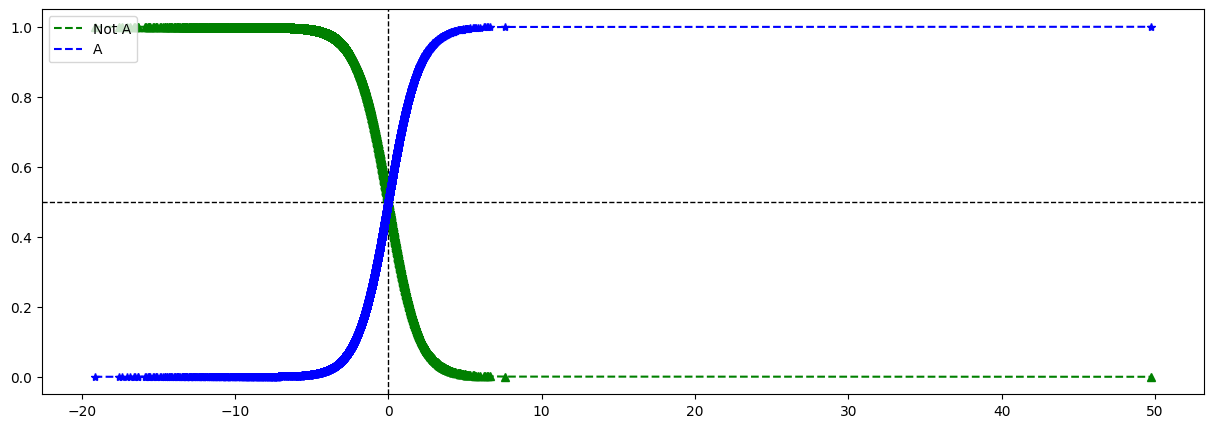

In [11]:
import matplotlib.pyplot as plt
# 그래프 크기 가로15, 세로 5
plt.figure(figsize=(15,5))

# y축에 y=0.5위치에 점선으로 가로선 그린다.
plt.axhline(y=0.5, linestyle='--', color='black', linewidth=1)
# x축에 x=0 위치에 점선으로 세로선 그린다.
plt.axvline(x=0, linestyle='--', color='black', linewidth=1)

plt.plot(df['decision_function'], df['Not A'], 'g--', label='Not A') # 'NotA' 데이터를 초록색 점선으로 플롯
plt.plot(df['decision_function'], df['Not A'], 'g^') # 'Not A' 데이터 포인트에 초록색 삼각형 마커 추가
plt.plot(df['decision_function'], df['A'], 'b--', label='A') # 'A' 데이터를 파란색 점선으로 플롯
plt.plot(df['decision_function'], df['A'], 'b*') # 'A' 데이터 파란색 별 마커 추가

# 축에 대한 레이블 설정
plt.xlabel
plt.ylabel

# 왼쪽 위에 범례 추가
plt.legend(loc='upper left')

plt.show()

predict 메서드로 테스트데이터세트 test_x 에 대한 예측값을 pred로 반환한 뒤, test_y와 pred를 입력받아 혼동행렬을 반환한다.
뒤이어 정확도, 정밀도, 재현율, F1 스코어, AUC 값을 반환

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

pred = logR.predict(test_x)

test_cm = confusion_matrix(test_y, pred) # 혼동 행렬(confusion matrix)
test_acc= accuracy_score(test_y, pred) # 정확도 (accuracy)
test_prc=precision_score(test_y, pred) # 정밀도 (precision)
test_rcll=recall_score(test_y, pred) # 재현율(recall)
test_f1=f1_score(test_y, pred) # F1 점수(F1 score)

# 혼동 행렬을 출력합니다.
print(test_cm)
print('\n')

# 각각 소수점 두 자리까지 반올림하여 출력한다.
print('정확도\t{}%'.format(round(test_acc * 100, 2)))
print('정밀도\t{}%'.format(round(test_prc * 100, 2)))
print('재현율\t{}%'.format(round(test_rcll * 100, 2)))
print('F1\t{}%'.format(round(test_f1 * 100, 2)))

[[2753  261]
 [ 342  662]]


정확도	84.99%
정밀도	71.72%
재현율	65.94%
F1	68.71%


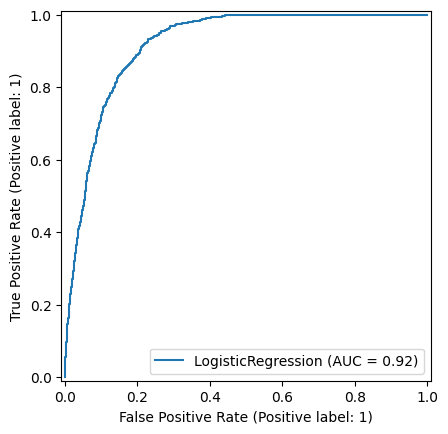

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

# 모델에서 ROC 커브를 그립니다.
RocCurveDisplay.from_estimator(logR, test_x, test_y)

# 그래프를 화면에 출력합니다.
plt.show()
